In [2]:
myFile=r'C:\Users\chirag\Desktop\ML IITK\Unsupervised Learning\DATA\winequality-white.csv'

import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

wine=pd.read_csv(myFile,sep=";")

Matplotlib Inline command is a magic command that makes the plots generated by matplotlib show in the IPython shell we are running and not in a separate output window

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine=wine[["sulphates","alcohol"]]

In [6]:
wine.shape

(4898, 2)

In [7]:
wine.agg(['mean','std'])

,sulphates,alcohol
mean,0.489847,10.514267
std,0.114126,1.230621


In [8]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [9]:
wine_std=pd.DataFrame(st.fit_transform(wine),
                     columns=list(wine.columns))

In [11]:
wine_std.agg(['mean','std'])

,sulphates,alcohol
mean,-7.572999e-16,-2.169718e-15
std,1.000102e+00,1.000102e+00


In [12]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
for n_clusters in range(2,10):
    cluster_model=AgglomerativeClustering(n_clusters=n_clusters,affinity='euclidean',linkage='ward')
    cluster_labels=cluster_model.fit_predict(wine_std)
    silhouette_avg=silhouette_score(wine_std,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters,"The average silhouette score is:",silhouette_avg)

For n_clusters = 2 The average silhouette score is: 0.3091095689547383
For n_clusters = 3 The average silhouette score is: 0.36507065689263013
For n_clusters = 4 The average silhouette score is: 0.36394118955693916
For n_clusters = 5 The average silhouette score is: 0.2849369402765109
For n_clusters = 6 The average silhouette score is: 0.28173689619112985
For n_clusters = 7 The average silhouette score is: 0.30584775050004287
For n_clusters = 8 The average silhouette score is: 0.29918403546397854
For n_clusters = 9 The average silhouette score is: 0.2931385252344828


In [15]:
hclus=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [16]:
labels_hclus=hclus.fit_predict(wine_std)

In [17]:
wine_std.head()

,sulphates,alcohol
0,-0.349184,-1.393152
1,0.001342,-0.824276
2,-0.436816,-0.336667
3,-0.787342,-0.499203
4,-0.787342,-0.499203


In [19]:
wine['cluster_hclus']=labels_hclus

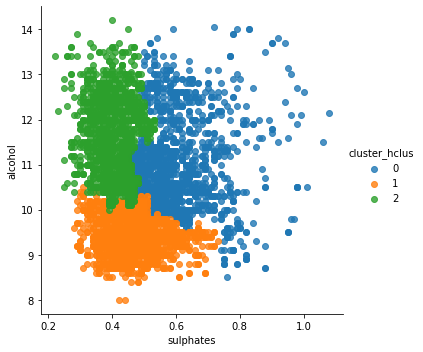

In [20]:
sns.lmplot(fit_reg=False,x='sulphates',y='alcohol',data=wine,hue='cluster_hclus')

In [21]:
range_n_clusters=[2,3,4,5,6,7,8,9]

In [22]:
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(wine_std)
    
    print(k,silhouette_score(wine_std,kmeans.labels_))

2 0.373763313307855
3 0.410983532952792
4 0.39210811085190245
5 0.33539276741752383
6 0.34757490320612566
7 0.3534711280105877
8 0.35390619494318576
9 0.34781768422333165


In [23]:
k=3
kmeans=KMeans(n_clusters=k)
kmeans.fit(wine_std)

KMeans(n_clusters=3)

In [24]:
labels=kmeans.labels_

In [25]:
wine['cluster']=labels

In [26]:
wine['cluster'].value_counts()

1    2275
0    1476
2    1147
Name: cluster, dtype: int64

In [27]:
wine.groupby(['cluster'])['sulphates','alcohol'].mean()

C:\Users\chirag\AppData\Local\Temp/ipykernel_11020/2655372920.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wine.groupby(['cluster'])['sulphates','alcohol'].mean()


,sulphates,alcohol
cluster,,
0,0.418631,11.811721
1,0.457257,9.556227
2,0.646129,10.744868


In [28]:
import seaborn as sns

In [29]:
%matplotlib inline

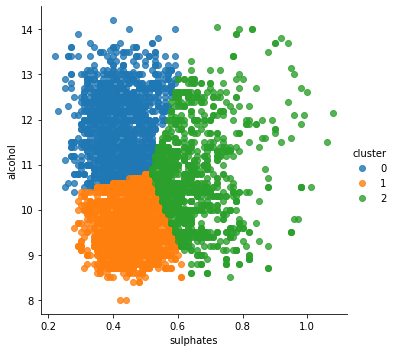

In [30]:
sns.lmplot(fit_reg=False,x='sulphates',y='alcohol',data=wine,hue='cluster')

In [31]:
wine.head()

,sulphates,alcohol,cluster_hclus,cluster
0,0.45,8.8,1,1
1,0.49,9.5,1,1
2,0.44,10.1,1,1
3,0.40,9.9,1,1
4,0.40,9.9,1,1


# DBSCAN

In [35]:
file=r'C:\Users\chirag\Desktop\ML IITK\Unsupervised Learning\DATA\moon_data.csv'

In [38]:
mydata=pd.read_csv(file)
mydata=mydata.iloc[:,1:]

In [39]:
mydata.head()

,X,Y
0,1.045255,0.332214
1,0.801944,-0.411547
2,-0.749356,0.775108
3,0.975674,0.191768
4,-0.512188,0.929997


C:\Users\chirag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


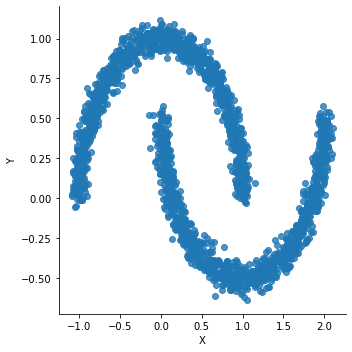

In [40]:
sns.lmplot('X','Y',data=mydata,fit_reg=False)

In [41]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_

C:\Users\chirag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


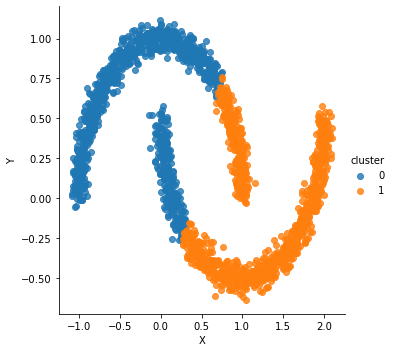

In [42]:
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
del mydata['cluster']

C:\Users\chirag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


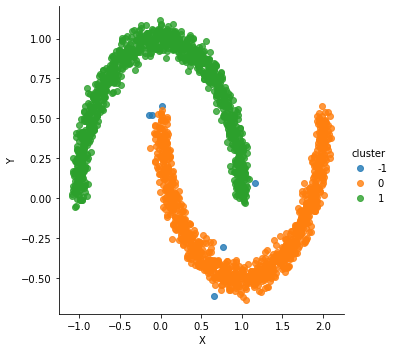

In [45]:
db=DBSCAN(eps=0.1,min_samples=30,metric='euclidean').fit(mydata)

mydata['cluster']=db.labels_
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)

In [46]:
pd.Series(db.labels_).value_counts()

 1    999
 0    995
-1      6
dtype: int64

# Anomaly Detection with DBSCAN

In [50]:
file=r'C:\Users\chirag\Desktop\ML IITK\Unsupervised Learning\DATA\Wholesale customers data.csv'

groc=pd.read_csv(file)
groc=groc[["Milk","Grocery"]]
groc_std=pd.DataFrame(scale(groc),columns=list(groc.columns))

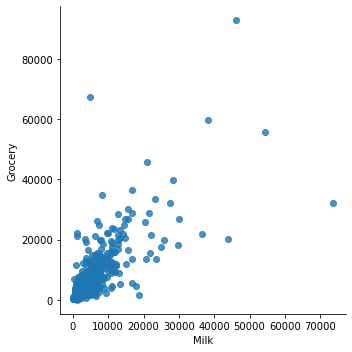

In [51]:
sns.lmplot(x="Milk",y="Grocery",data=groc,fit_reg=False)

In [52]:
# separate 5% high values 

r=np.linspace(0.5,4,10)
for epsilon in r:
    db=DBSCAN(eps=epsilon,min_samples=20,metric='euclidean').fit(groc_std)
    labels=db.labels_
    outlier=np.round((labels==-1).sum()/len(labels)*100,2)
    print("For epsilon = ",epsilon,", percentage of outliers is: ",outlier)

For epsilon =  0.5 , percentage of outliers is:  9.77
For epsilon =  0.8888888888888888 , percentage of outliers is:  4.55
For epsilon =  1.2777777777777777 , percentage of outliers is:  2.05
For epsilon =  1.6666666666666667 , percentage of outliers is:  1.59
For epsilon =  2.0555555555555554 , percentage of outliers is:  1.36
For epsilon =  2.4444444444444446 , percentage of outliers is:  1.14
For epsilon =  2.8333333333333335 , percentage of outliers is:  0.91
For epsilon =  3.2222222222222223 , percentage of outliers is:  0.68
For epsilon =  3.611111111111111 , percentage of outliers is:  0.68
For epsilon =  4.0 , percentage of outliers is:  0.45


In [53]:
db=DBSCAN(eps=0.88,min_samples=20,metric='euclidean').fit(groc_std)
groc['cluster']=db.labels_

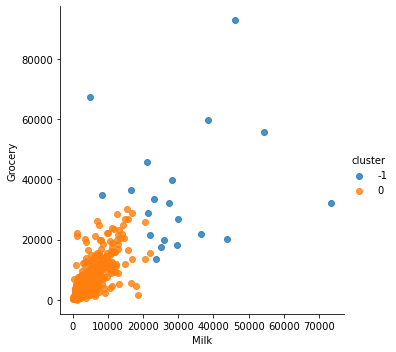

In [54]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False,hue='cluster')

https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec